<a href="https://colab.research.google.com/github/Badar97/Progetto_DataScience/blob/main/3-NetworkX/SocialNetworkAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SOCIAL NETWORK ANALYSIS**

## **1 Inizializzazione**

In [76]:
import networkx as nx
import pandas as pd
import seaborn as sns
import warnings
import requests
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
warnings.filterwarnings('ignore')

In [39]:
%matplotlib inline 

In [119]:
def draw(G, pos, measures, measure_name):
    
    plt.figure(figsize=(20,20))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=200, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    #labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, alpha=0.2)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [70]:
url = "https://raw.githubusercontent.com/Badar97/Progetto_DataScience/main/3-NetworkX/arenas-jazz.edges"
req = requests.get(url)
req = req.text

split = req.split('\n')
splitted = list(split)

dati = pd.DataFrame(splitted, columns = ['archi'])
dati[['nodo1', 'nodo2']] = dati.archi.str.split(",", expand = True)
dati.drop(dati.tail(1).index,inplace=True)

archi = dati.drop(['archi'], axis=1)

In [71]:
G = nx.from_pandas_edgelist(archi, source='nodo1', target='nodo2')

In [105]:
grado = dict(G.degree())
nodes = list(G.nodes)

In [101]:
print("NODES: ", len(G.nodes))
print("EDGES: ", len(G.edges))
print("RAGGIO: ", nx.radius(G))
print("DIAMETRO: ", nx.diameter(G))
print("DENSITY: ", nx.density(G))
print("IS_CONNECTED: ", nx.is_connected(G))
print("CLUSTERING: ", nx.average_clustering(G))
print("N. OF CYCLE: ",len(nx.cycle_basis(G)))

NODES:  198
EDGES:  2742
RAGGIO:  4
DIAMETRO:  6
DENSITY:  0.14059375480695277
IS_CONNECTED:  True
CLUSTERING:  0.6174507021536301
N. OF CYCLE:  2545


In [74]:
pos = nx.spring_layout(G)
posc = nx.circular_layout(G)
posk = nx.kamada_kawai_layout(G)
poss = nx.spiral_layout(G)

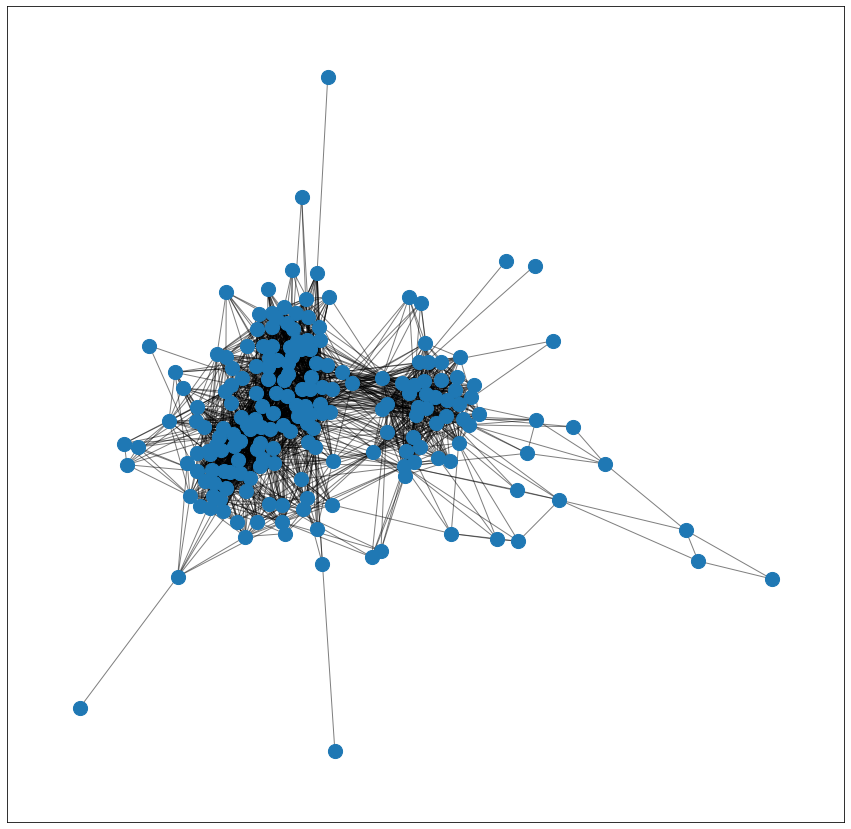

In [75]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G, pos, node_size=200)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

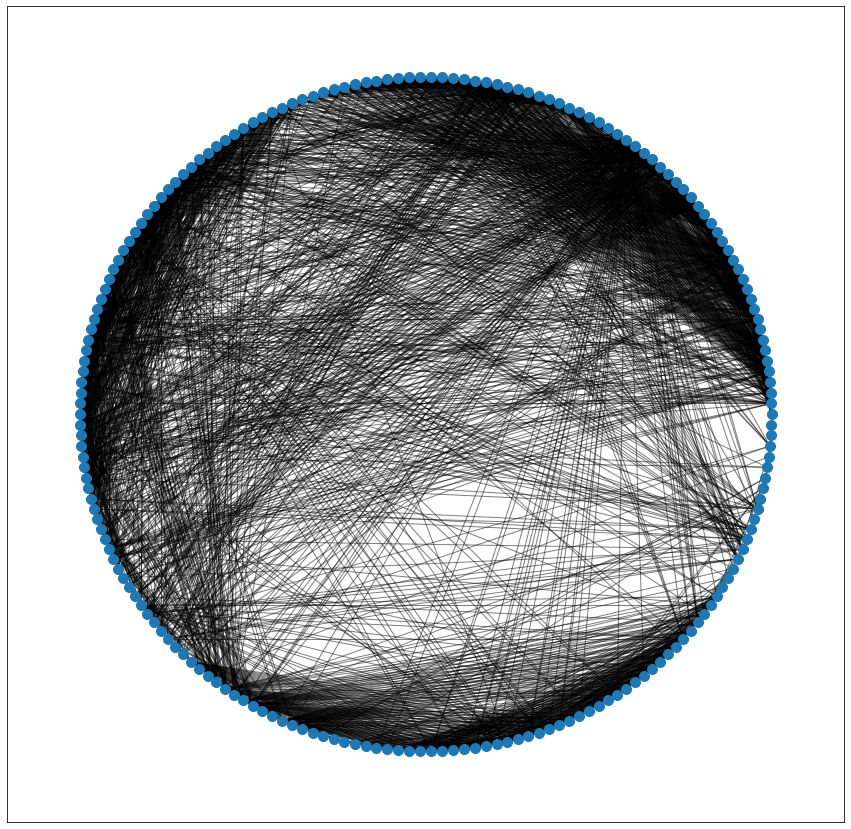

In [62]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G, pos=posc, node_size=100)
nx.draw_networkx_edges(G, pos=posc, alpha=0.5)
plt.show()

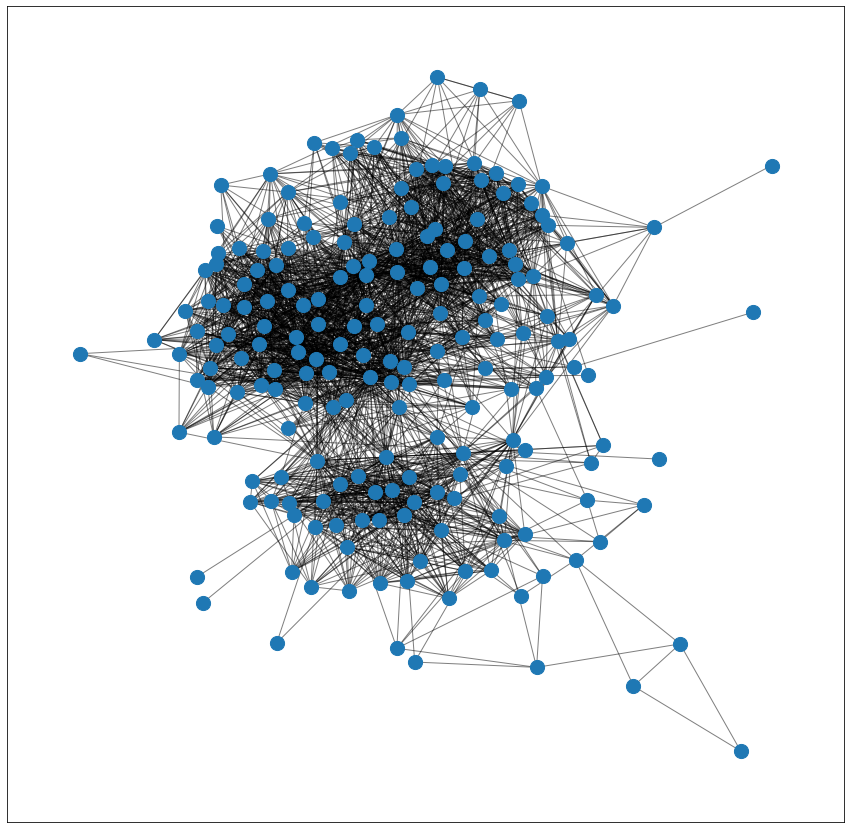

In [63]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G, pos=posk, node_size=200)
nx.draw_networkx_edges(G, pos=posk, alpha=0.5)
plt.show()

## **2.1 Degree Centrality**

Quanti neighbors ha ciascun nodo?

In [106]:
ranks = [(k, v) for k, v in sorted(grado.items(), key=lambda item: -item[1])]
ranks[0:5]

[('67', 100), ('7', 96), ('20', 75), ('23', 74), ('90', 62)]

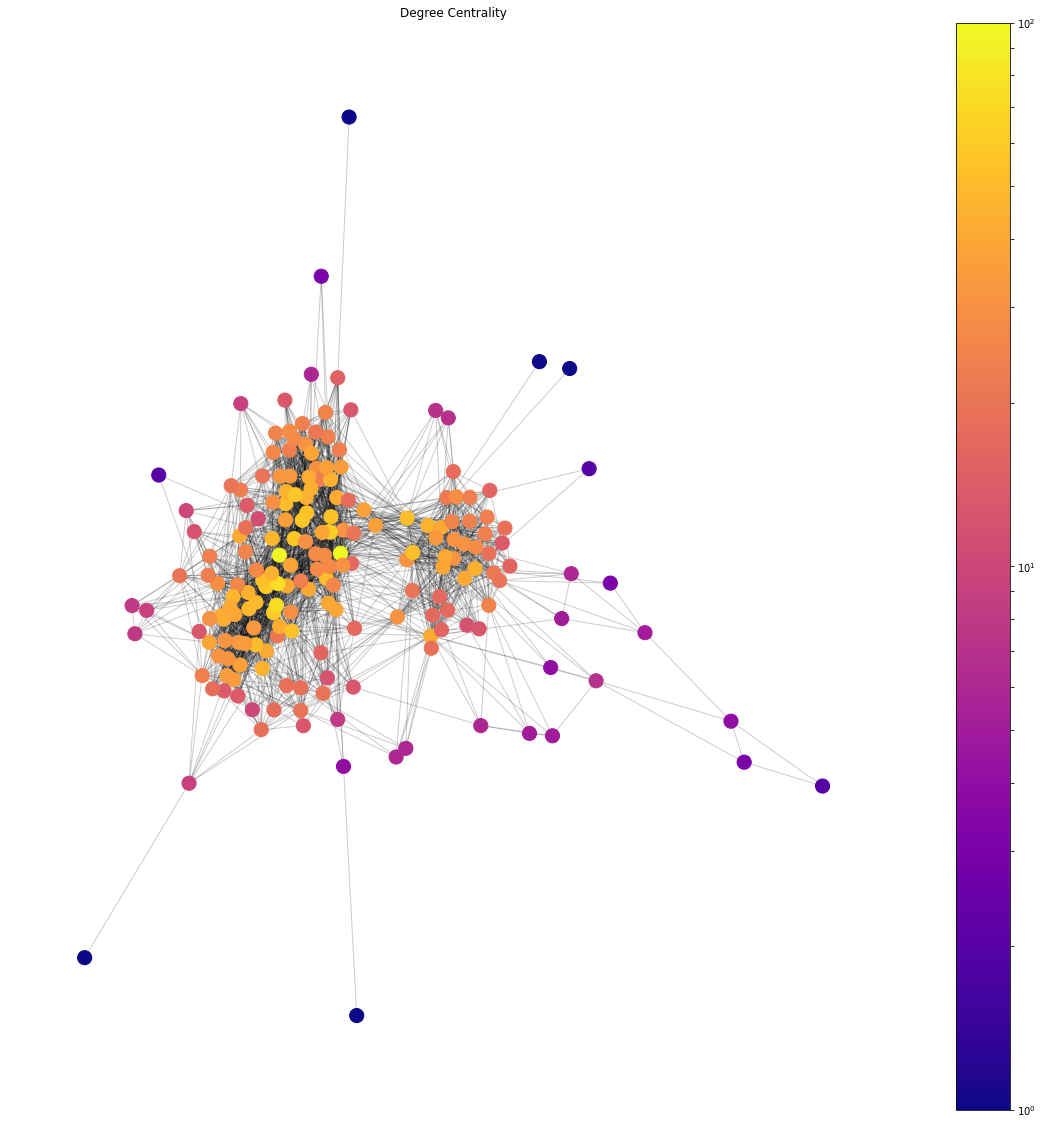

In [107]:
draw(G, pos, grado, 'Degree Centrality')

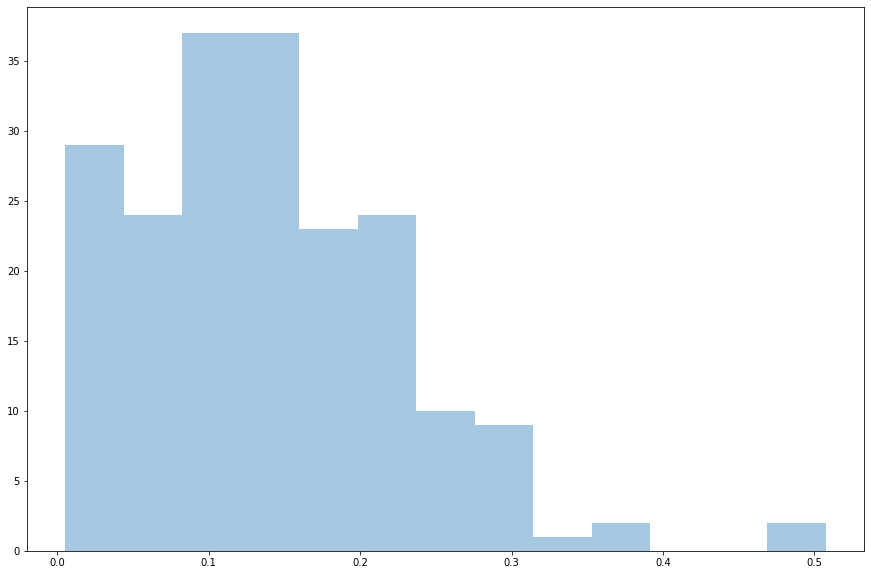

In [115]:
degree = nx.degree_centrality(G)
plt.figure(figsize=(15,10))
sns.distplot(list(degree.values()), kde=False)

## **3 Closeness Centrality**

In [116]:
closeness = nx.closeness_centrality(G)

In [117]:
ranks = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
ranks[0:5]

[('67', 0.6480263157894737),
 ('7', 0.5898203592814372),
 ('23', 0.5811209439528023),
 ('90', 0.5596590909090909),
 ('93', 0.5580736543909348)]

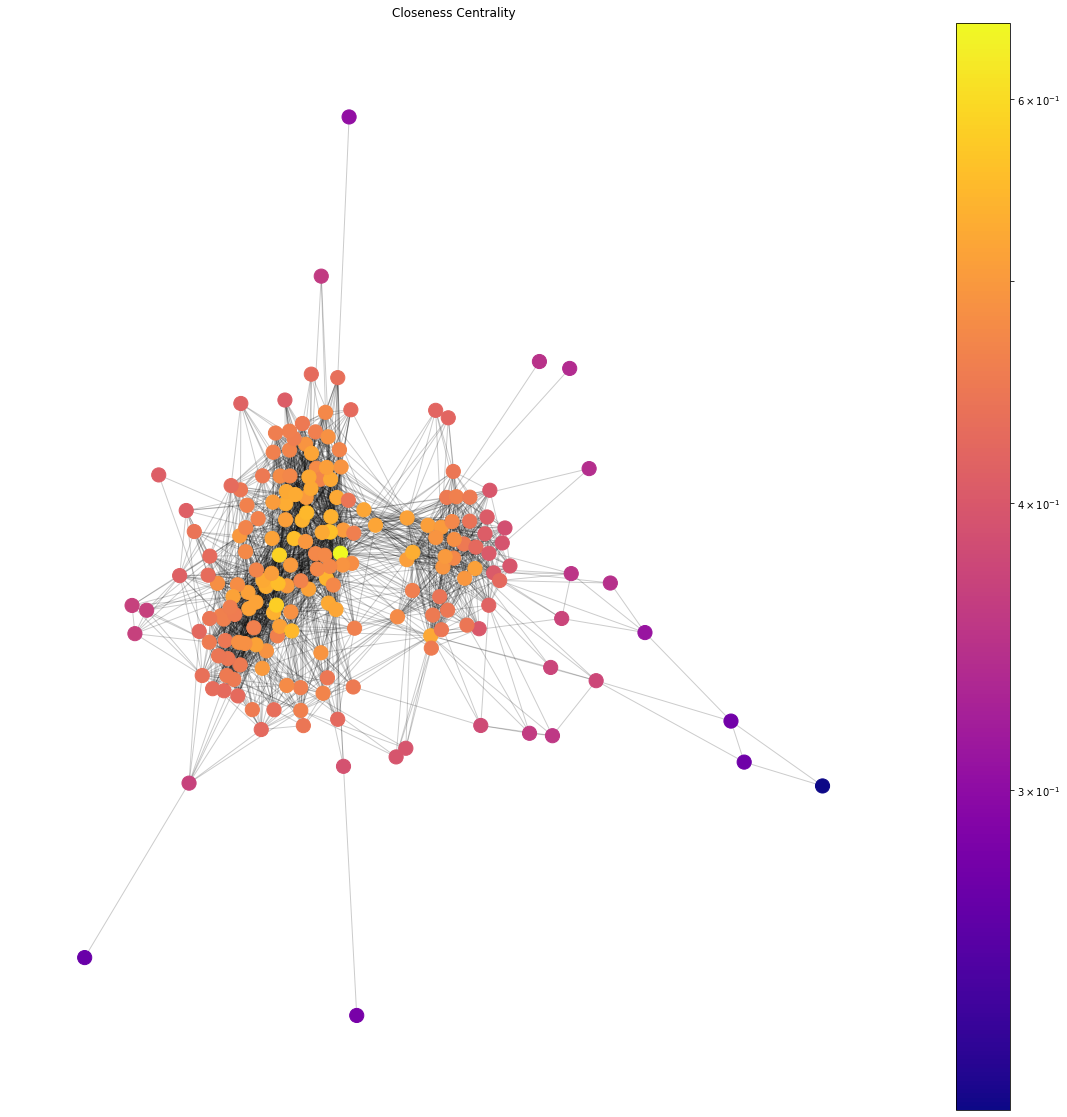

In [120]:
draw(G, pos, closeness, 'Closeness Centrality')

## **Betweenness Centrality**

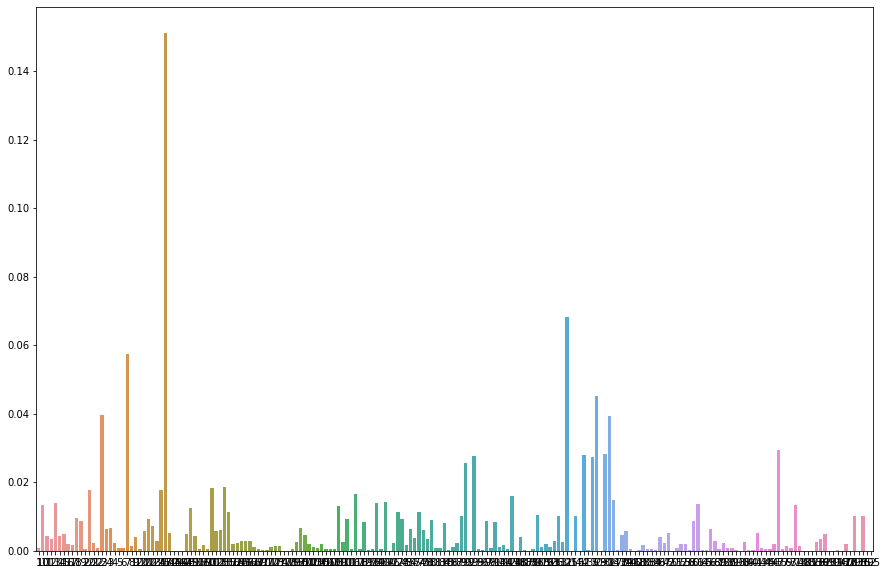

In [82]:
bet = nx.betweenness_centrality(G)
plt.figure(figsize=(15,10))
sns.barplot(x=list(bet.keys()), y=list(bet.values()))

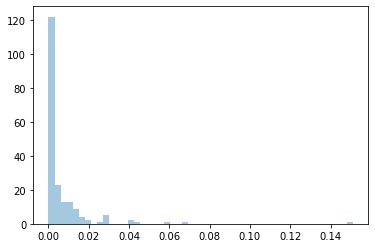

In [79]:
sns.distplot(list(bet.values()), kde=False)
#questo per vedere la quantità di nodi con centralità alta e bassa

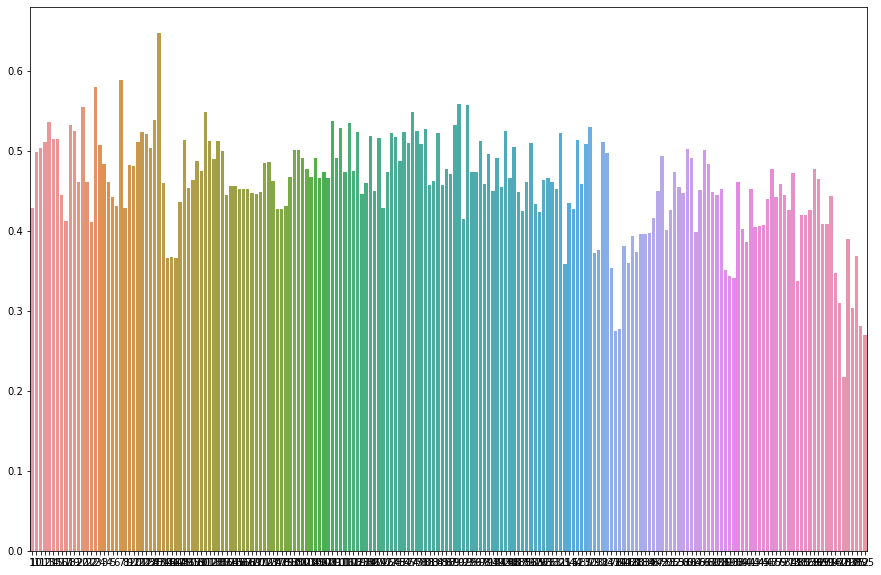

In [81]:
clos = nx.closeness_centrality(G)
plt.figure(figsize=(15,10))
sns.barplot(x=list(clos.keys()), y=list(clos.values()))

<Figure size 864x864 with 0 Axes>

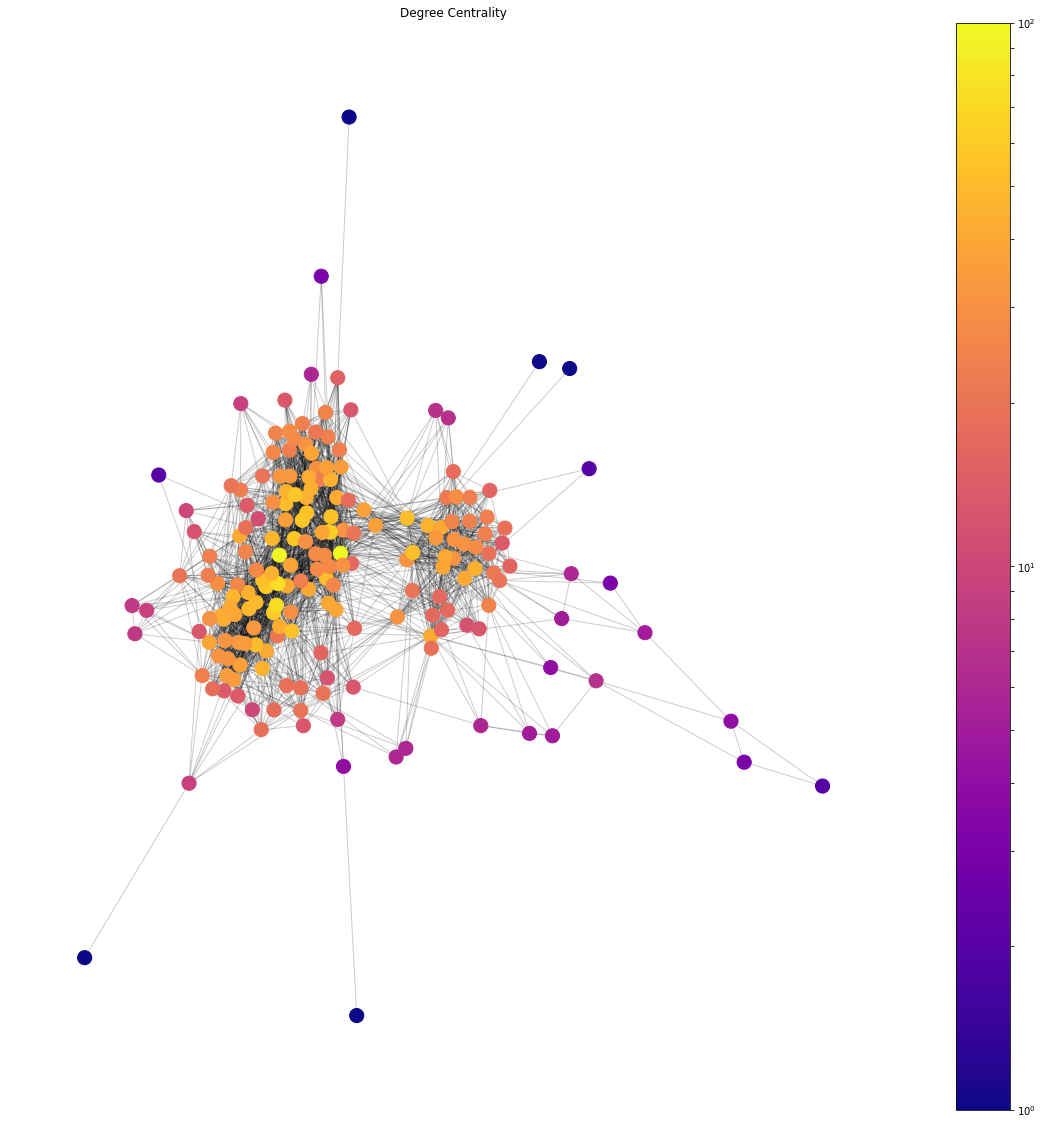

In [94]:
plt.figure(figsize=(12,12))
draw_net(G, pos, degree, 'Degree Centrality')

<Figure size 864x864 with 0 Axes>

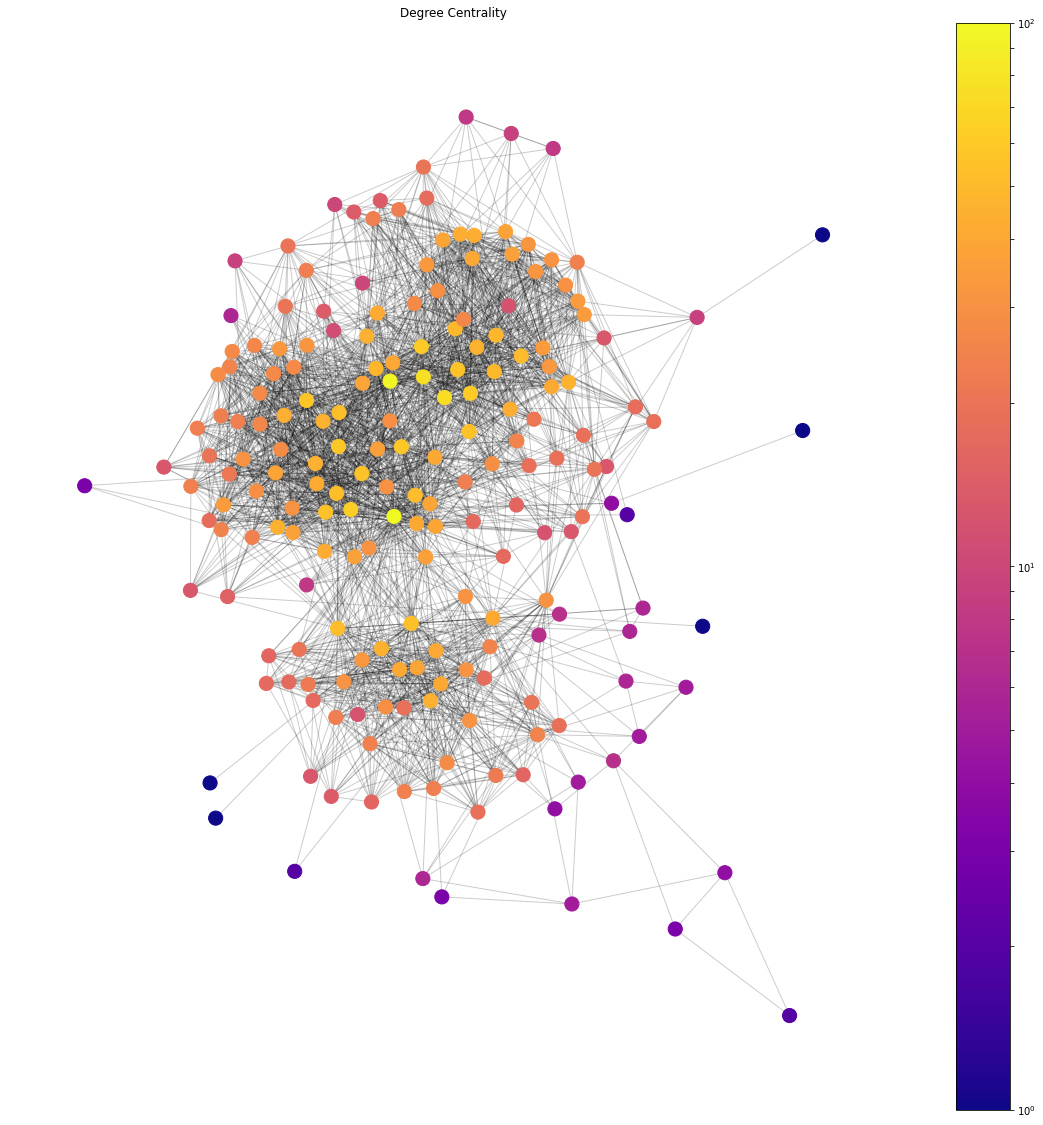

In [96]:
plt.figure(figsize=(12,12))
draw_net(G, posk, degree, 'Degree Centrality')

<Figure size 864x864 with 0 Axes>

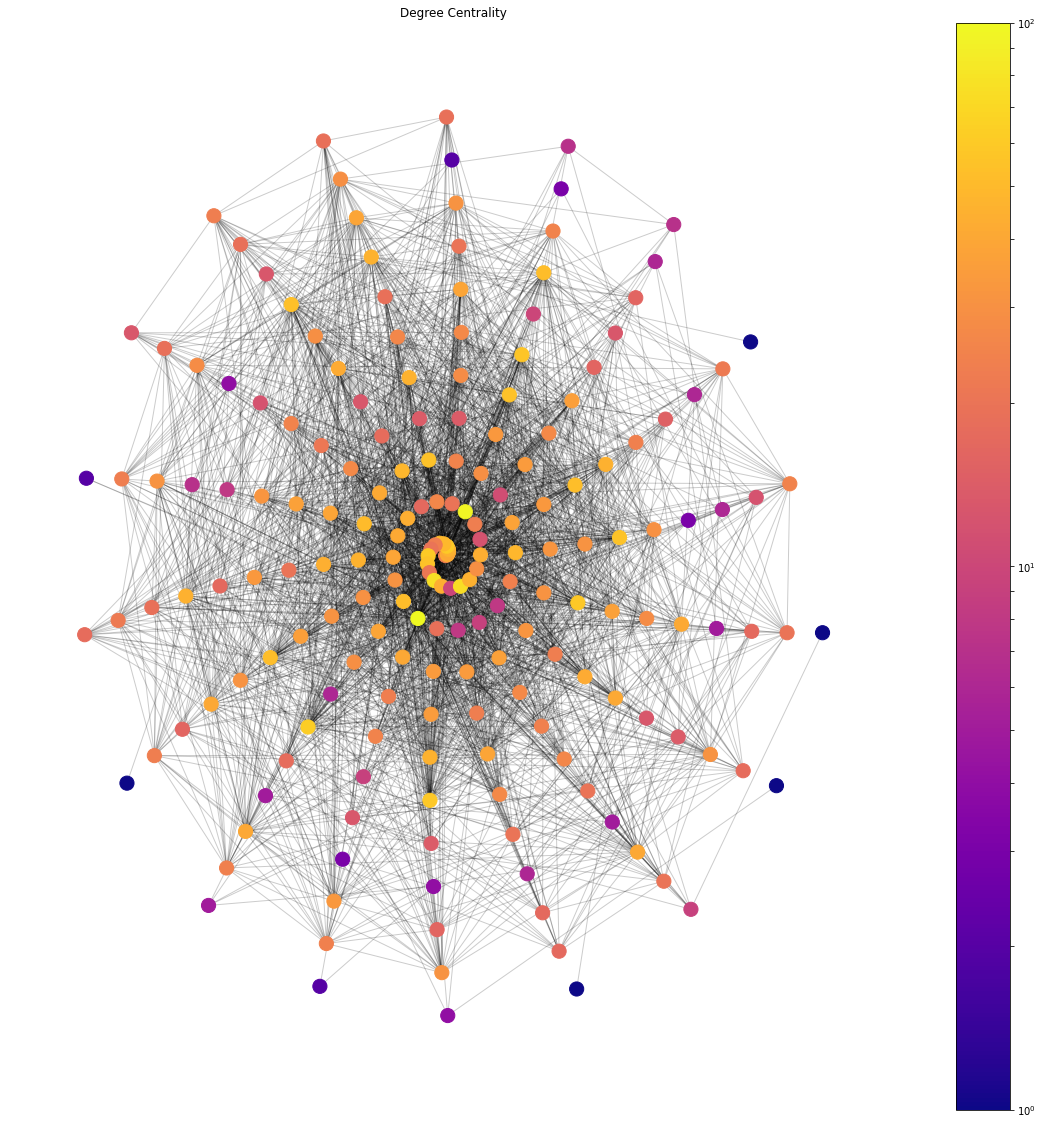

In [97]:
plt.figure(figsize=(12,12))
draw_net(G, poss, degree, 'Degree Centrality')

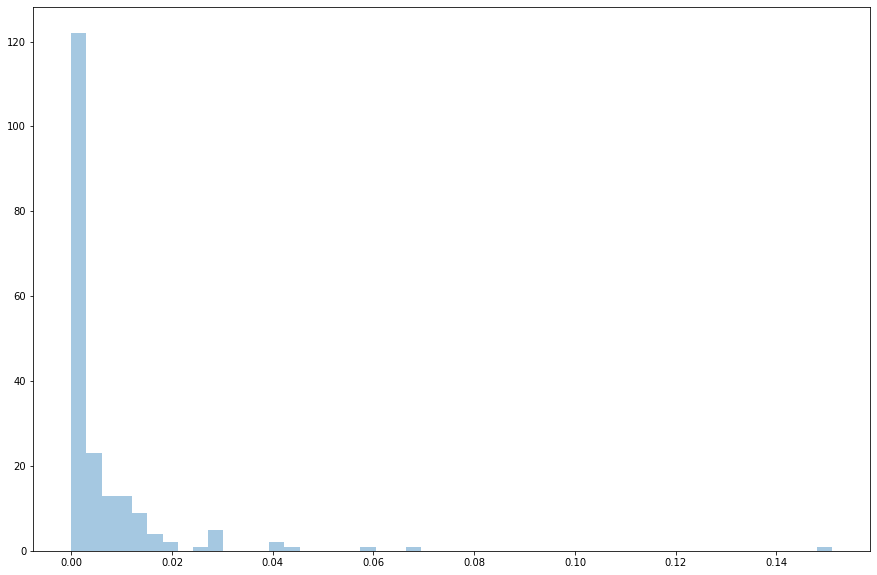

In [98]:
bet = nx.betweenness_centrality(G)
plt.figure(figsize=(15,10))
sns.distplot(list(bet.values()), kde=False)